In [3]:
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# 1. Isotherm below the critical temperature

# Initial temperature = 18.1 C pm 0.1
TMP_ERR = 0.1
VOL_ERR = 0.05
PSR_ERR = 0.25

volumes = (4, 3.8, 3.6, 3.4, 3.2, 3.0, 2.8, 2.6, 2.4, 2.2, 2.0, 1.8, 1.6, 1.4, 1.2, 1.0, 0.8, 0.6, 0.4, 0.2)
pressures = (6.5, 7.25, 7.75, 8.5, 9, 9.75, 10.5, 11.25, 12.25, 13.5, 14.75, 16.5, 18.5, 20.75, 23.5, 27, 31.25, 35.5, 36, 40)

print(len(volumes), len(pressures))

20 20


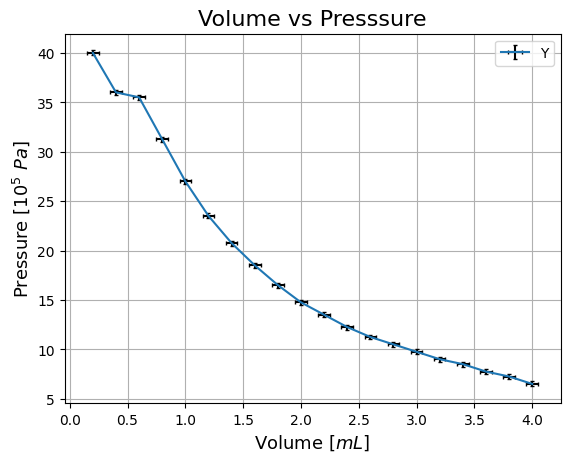

In [5]:
plt.title(r'Volume vs Presssure', fontsize='16')
# plt.plot(volumes, pressures)
# plt.scatter(volumes, pressures)
plt.errorbar(volumes, pressures, yerr=PSR_ERR, xerr=VOL_ERR, ecolor='black', capsize=1.5, linestyle='-',)
plt.xlabel(r'Volume $[mL]$', fontsize='13')
plt.ylabel(r'Pressure $[10^5 \ Pa]$',fontsize='13')
plt.legend(('YvsX'),loc='best')
# plt.savefig('Y_X.png
plt.grid()
plt.show()

In [6]:
def leastsq(x: np.ndarray, y: np.ndarray, sigma: float) -> 'tuple[[float, float], [float, float]]':
    """ Computes the least squares of the 1D vectors x and y.
    Raises:
        ValueError: If the lengths of the arrays are not equal.
        ValueError: If the array x is empty. It is checked after the lengths so y would also be empty.
    Returns:
        tuple((float, float), (float, float)): Returns a tuple containing two tuples.
            The first one contains at position 0 the slope (m in literature) and at position 1 its error.
            The second one contains at position 0 the y-intercept (b in literature) and at position 1 its error.
    """
    n = len(x)

    if n != len(y):
        raise ValueError(f'Length of the data array must be equal, length of x is {n} and y is {len(y)}. Please check. ')

    if n == 0:
        raise ValueError('Arrays cannot be empty. Please check.')

    sum_x, sum_y = np.sum(x), np.sum(y)
    sum_x2 = np.sum(x*x)
    sum_xy = np.sum(x*y)

    div = 1 / (sum_x**2 - n*sum_x2)
    m = (sum_x*sum_y - n*sum_xy) * div
    b = (sum_x*sum_xy - sum_xy*sum_x2) * div

    m_e = np.sqrt(n*sigma**2 * (-1) * div)
    b_e = np.sqrt(sum_x2*sigma**2 * (-1) * div)

    return (m, m_e), (b, b_e)

In [8]:
# MEDIDAS DE MORAGA

temperatures = (18.9, 21, 22, 24.2, 25, 26, 27.2, 28, 29.2, 30.1, 31, 31.3)
pressures = (35.5, 36.5, 37.25, 38.5, 39, 39.25, 39.75, 40, 40.5, 40.75, 41, 41.25)

log_p = np.array(pressures)

log_p = log_p * 1e5

log_p = np.log(log_p)

inv_temp = np.array(temperatures)

inv_temp = inv_temp + 273

inv_temp = 1 / inv_temp

sigma = np.sum(inv_temp**2 * TMP_ERR) / len(inv_temp)

print('(m, m_e), (b, b_e)', leastsq(inv_temp, log_p, sigma=sigma))

(m, m_e), (b, b_e) ((-1047.0803403834936, 0.007400368462492177), (-88908.0619189224, 2.474358990521896e-05))


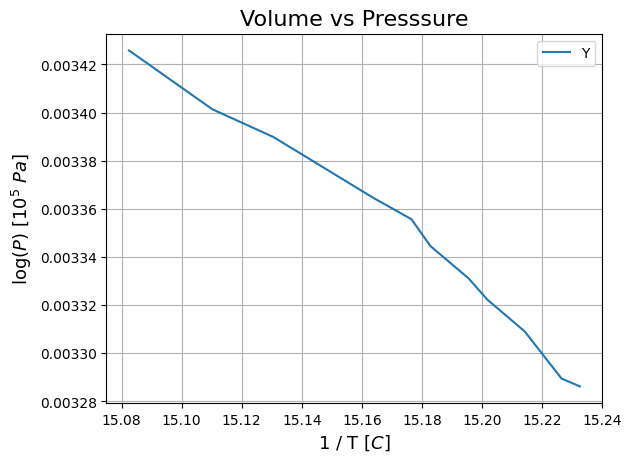

In [9]:
plt.title(r'Volume vs Presssure', fontsize='16')
plt.plot(log_p, inv_temp)
# plt.errorbar(log_p, inv_temp, yerr=PSR_ERR, xerr=VOL_ERR, ecolor='black', capsize=1.5, linestyle='-',)
plt.xlabel(r'1 / T $[C]$', fontsize='13')
plt.ylabel(r'$\log(P) \ [10^5 \ Pa]$',fontsize='13')
plt.legend(('YvsX'),loc='best')
# plt.savefig('Y_X.png
plt.grid()
plt.show()

In [14]:
# La temp a la que está ahora es 32.4 C


volumes = (4, 3.8, 3.6, 3.4, 3.2, 3.0, 2.8, 2.6, 2.4, 2.2, 2.0, 1.8, 1.6, 1.4, 1.2, 1.0, 0.8, 0.6, 0.4, 0.2)
pressures = (7.5, 8, 8.5, 9, 9.75, 10.5, 11, 12.25, 13.25, 14.5, 16, 17.75, 20, 22.5, 26, 29.5, 35, 41, 47, 48)


print(len(volumes), len(pressures))

20 20


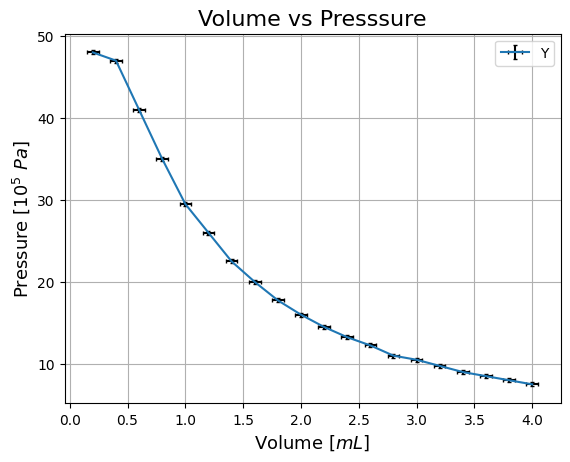

In [15]:
plt.title(r'Volume vs Presssure', fontsize='16')
# plt.plot(volumes, pressures)
# plt.scatter(volumes, pressures)
plt.errorbar(volumes, pressures, yerr=PSR_ERR, xerr=VOL_ERR, ecolor='black', capsize=1.5, linestyle='-',)
plt.xlabel(r'Volume $[mL]$', fontsize='13')
plt.ylabel(r'Pressure $[10^5 \ Pa]$',fontsize='13')
plt.legend(('YvsX'),loc='best')
# plt.savefig('Y_X.png
plt.grid()
plt.show()